# Objectifs

Les objectifs de la leçon sont les suivants:
* Connaître les différents types de variables
* Utiliser des fonctions de base en Python
* Etre capable de faire des visualisations de base en Python

# Importer les librairies

In [1]:
#pip install pandas

In [2]:
#pip install seaborn

In [3]:
import pandas as pd 
import os

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Loader les données

In [4]:
# Loader les data
filepath = os.getcwd() + "/Data/titanic.csv"
data = pd.read_csv(
    filepath,
    delimiter=","
)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Supprimer les colonnes dont nous n'avons pas besoin
data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Comprendre la "big picture"

Les jeu de données contient une ligne par passager du Titanic et 8 colonnes:
* Survived: Si le passager a survécu au naufrage.
* Pclass: La classe du ticket du passager (1=1st, 2=2nd, 3=3rd).
* Sex: Le genre du passager.
* Age: L'âge du passager.
* SibSp: Le nombre de frères et soeurs/mari/femme du passager à bord .
* Parch: Le nombre de parents/enfants du passager à bord.
* Fare: Le prix du billet du passager.
* Embarked: Le port d'embarcation du passager (S=Southampton, C=Cherbourg, Q=Queenstown).

Les **variables qualitatives nominales** sont Survived, Sex et Embarked. Pclass est l'unique **variable qualitative ordinale**. Les **variables quantitatives** sont Age et Fare.

# Analyse exploratoire des données

## Quelques fonctions utiles pour débuter

Deux des fonctions les plus utilisées sont [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html). Celles-ci permettent de voir un certain nombre de lignes (par défaut 5 lignes) au début ou à la fin des données. Elles sont très utiles pour voir rapidement une partie des données.

In [6]:
# Voir les 5 premières lignes
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
# Voir les 5 dernières lignes
data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


[`shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) est une autre fonction utile qui retourne une paire de nombres qui représentent la dimension des data. Elle est utile pour connaître le nombre de lignes et le nombre de colonnes.

In [8]:
# Combien de lignes? Combien de colonnes?
data.shape

(891, 8)

[`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) donne un petit résumé sur les data, comme le type des variables et le nombre de valeurs non null par colonne par exemple.

In [9]:
# Combien de valeurs null par colonne?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
# Supprimer les lignes contenant des valeurs null
data = data.dropna(axis=0) # on supprime les lignes (axe 0) et pas les colonnes 

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


## Analyse univariée

### Variables qualitatives

#### Comptes et pourcentages

La function [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) compte le nombre d'occurences de chaque élément unique de la variable, et est l'une des fonctions les plus importantes pour comprendre les variables qualitatives.

In [11]:
# Combien de passagers ont survécu au naufrage?
data["Survived"].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

Il est également possible de retourner le pourcentage de chaque élément unique de la variable, en passant l'argument `normalize=True` à cette même fonction.

In [12]:
# Quel pourcentage des passagers a survécu?
data["Survived"].value_counts(normalize=True)

Survived
0    0.595506
1    0.404494
Name: proportion, dtype: float64

#### Visualisations

Les deux visualisations les plus courantes pour visualiser une variable qualitative sont le **count plot** et la **pie chart**. Les fonctions [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) et [`matplotlib.pyplot.pie()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) sont utilisées respectivement. On utilise matplotlib pour la pie chart car aucune fonction n'existe pour ce genre de visualisation avec seaborn.

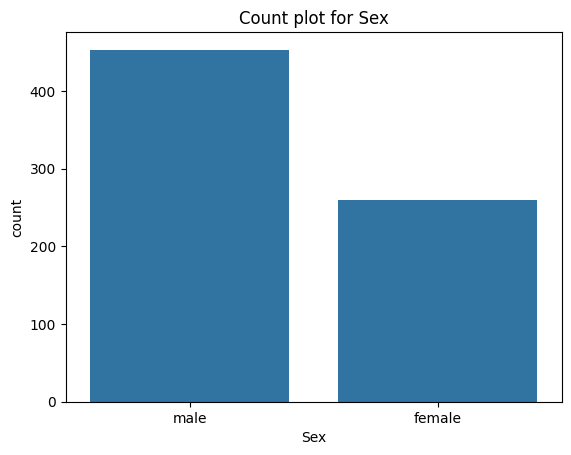

In [13]:
# Bar chart pour visualiser les genres des passagers
sns.countplot(
    data=data,# `data` est le nom de notre variable contenant les data
    x="Sex" # la colonne dans `data` qui nous intéresse
)
plt.title("Count plot for Sex") # on ajoute un titre
plt.show()

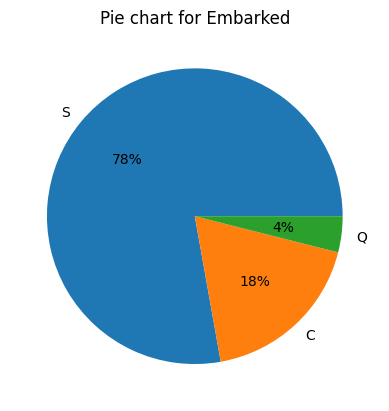

In [14]:
# Pie chart pour visualiser les ports d'embarcation des passagers
plt.pie(
    data["Embarked"].value_counts().values, # les values sont le nombre d'occurences des éléments uniques
    labels=data["Embarked"].value_counts().keys(), # les keys sont les éléments uniques
    autopct="%.0f%%" # ajouter les pourcentages comme labels
)
plt.title("Pie chart for Embarked")
plt.show()

### Variables quantitatives

#### Moyenne, médiane, mode et écart-type

La moyenne, la médiane et le mode sont les trois mesures de tendance centrales les plus connues et permettent de résumer un ensemble de données avec une seule valeur **pour les variables quantitatives**. Celles-ci peuvent facilement être calculer à l'aide des fonctions [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html), [`median()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html) et [`mode()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html).
L'écart-type est également une mesure fréquemment utilisée comme mesure de dispersion. En général, on le préfère à la variance car celui-ci est sur la même unité de mesure que les données. La fonction [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html) permet de calculer l'écart-type.

In [15]:
# Quel est le prix moyen des tickets?
data["Fare"].mean()

np.float64(34.567251404494385)

In [16]:
# Quel est le nombre médian du nombre frères et soeurs/mari et femme parmi passagers?
data["SibSp"].median()

np.float64(0.0)

In [17]:
# De quel port d'embarcation viennent le plus de passagers?
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [18]:
# Quel est l'écart type de l'âge des passagers?
data["Age"].std()

np.float64(14.49293290032352)

#### Visualisations

La visualisation la plus courante pour visualiser une variable quantitative est l'**histogram**. La fonction [`sns.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html) permet ceci.

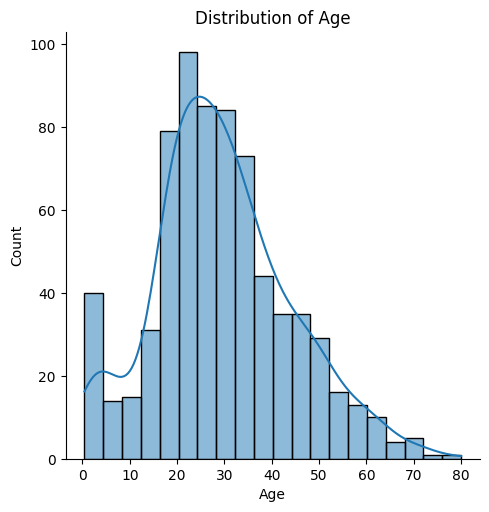

In [19]:
# Histogram de l'âge des passagers
sns.displot(
    data=data, # notre dataframe
    x="Age", # notre colonne
    kde=True # ajouter une courbe d'estimation
)
plt.title("Distribution of Age")
plt.show()

Une autre manière de visualiser la distribution d'une variable quantitative est d'utiliser un **box plot**. Il est possible d'utiliser [`sns.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

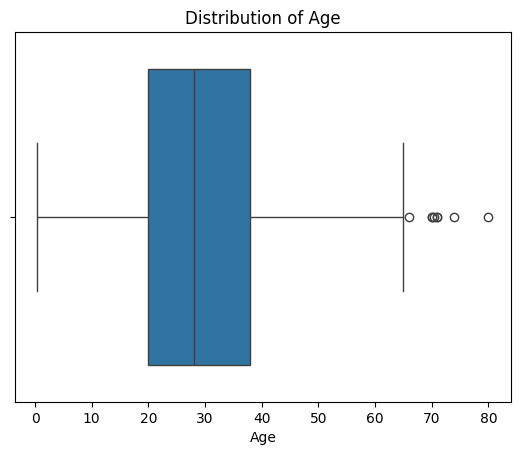

In [20]:
# Boxplot de l'âge des passagers
sns.boxplot(
    data=data, # notre dataframe
    x="Age"
)
plt.title("Distribution of Age")
plt.show()

Seaborn considère comme valeurs minimum Q1-1.5xIQR et comme valeur maximum Q3+1.5xIQR. Toute valeur en dehors de ces bornes est considérée comme une valeur aberrante, et est représentée par un losange noir. Par exemple, la valeur maximum de l'âge considérée par seaborn est 65 pour les survivants, alors que la valeur maximum est en fait 80. Les âges supérieurs à 65 sont donc considérés comme des valeurs aberrantes.

## Analyse bivariée

### Etudier la relation entre une variable qualitative et une variable quantitative

La box plot est un type de visualisation fréquemment utilisé pour étudier comment deux variables, une qualitative et une quantitative, sont liées. La fonction [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) permet ceci.

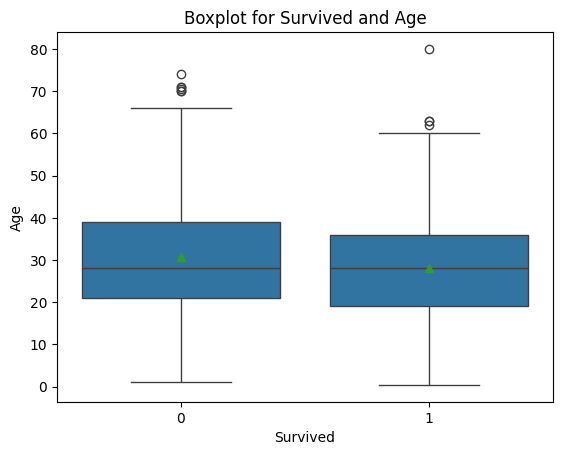

In [21]:
# Quelles sont les distributions des âges selon si la personne
# a survecu ou non? The box plot way!
sns.boxplot(
    data=data,
    x="Survived",
    y="Age",
    showmeans=True # montrer les moyennes (False par défaut)
)
plt.title("Boxplot for Survived and Age")
plt.show()

Visualiser les distributions à travers des histograms peut etre aussi une autre manière d'étudier la relation entre une variable qualitative et une variable quantitative:

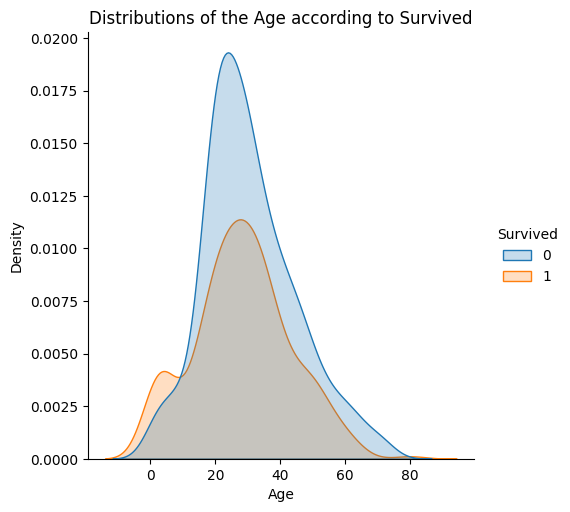

In [22]:
# Distributions des âges en fonction des survivants
sns.displot(
    data=data,
    x="Age",
    hue="Survived",
    kind="kde",
    fill=True # remplir les distributions
)
plt.title("Distributions of the Age according to Survived")
plt.show()

Les deux distributions se chevauchent presque. 

On remarque que parmi les personnes de moins de 20 ans, il y en a plus qui ont survécu que le contraire. On peut supposer que lors du sauvetage, la priorité a été donnée aux enfants ou adolescents.

Parmi les passagers entre 20 et 45 ans, plus de personnes sont mortes.

Peu de conclusions peuvent être tirées pour les personnes de plus de 60 ans.

### Etudier la relation entre deux variables quantitatives

Le scatter plot est le type de visualisation le plus utilisé pour étudier la relation entre 2 variables quantitatives. Il est facilement possible de créer un scatter plot avec [`sns.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

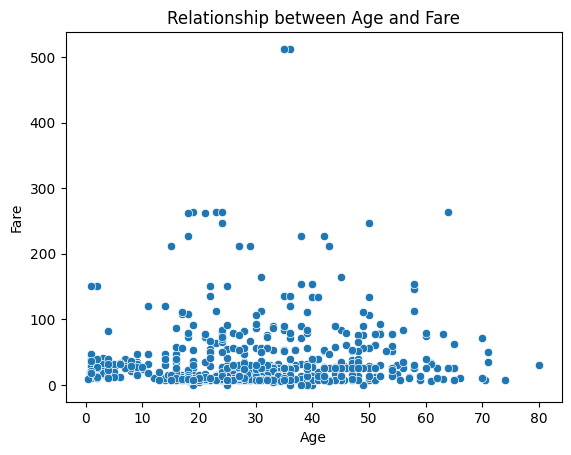

In [23]:
# Scatter plot entre Age et Fare
sns.scatterplot(
    data=data,
    x="Age",
    y="Fare"
)
plt.title("Relationship between Age and Fare")
plt.show()

Presque rien ne peut être utiliser à partir de ce scatter plot. Il ne semble pas y avoir de schémas intéressant.

### Etudier la relation entre deux variables qualitatives

Un type de visualisation utile pour étudier la relation entre deux variables qualitatives est le **grouped bar chart**. La fonction [`sns.catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html#) permet la création de ce type de visualisation.

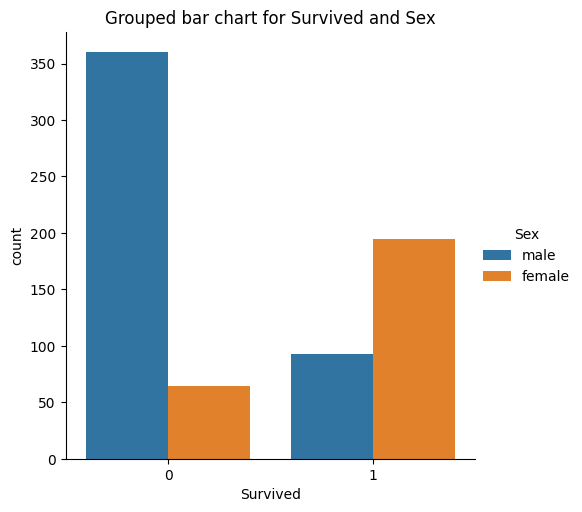

In [24]:
# Comment varie le nombre d'hommes et de femmes parmi les 
# survivants et les non survivants?
sns.catplot(
    data=data,
    x="Survived",
    hue="Sex",
    kind="count" # on souhaite obtenir le count 
)
plt.title("Grouped bar chart for Survived and Sex")
plt.show()

La plupart des femmes ont survécu, alors que la plupart des hommes n'ont pas survécu. On peut supposer qu'en raison de la politique "Les femmes d'abord", la priorité a été donnée aux passagères plutôt qu'aux passagers.